In [1]:
### Import liberires

In [7]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt



### Load the dataset

In [6]:
data = pd.read_csv('top_insta_influencers_data.csv.csv')

In [8]:
data.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [48]:
data.describe()

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,like_follower_ratio,post_follower_ratio,avg_likes_ratio
count,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,199.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,200.000000
mean,100.500000,81.820000,3499.850000,7.740950e+07,1.787104e+06,1.902010,1.208132e+06,3.658112e+09,46.517946,6.402919e-05,0.028745
std,57.879185,8.878159,3475.828158,7.368727e+07,2.193359e+06,3.329719,1.858322e+06,5.561939e+09,36.732171,7.466047e-05,0.042315
min,1.000000,22.000000,10.000000,3.280000e+07,6.510000e+04,0.010000,0.000000e+00,1.830000e+07,0.398693,2.375297e-07,0.001275
25%,50.750000,80.000000,947.500000,4.000000e+07,5.044000e+05,0.410000,1.957500e+05,9.968500e+08,20.599251,1.527552e-05,0.008907
50%,100.500000,84.000000,2100.000000,5.005000e+07,1.100000e+06,0.880000,5.321500e+05,2.000000e+09,38.204739,3.360034e-05,0.017675
75%,150.250000,86.000000,5025.000000,6.890000e+07,2.100000e+06,2.035000,1.325000e+06,3.900000e+09,61.908481,8.015806e-05,0.030196
max,200.000000,93.000000,17500.000000,4.758000e+08,1.540000e+07,26.410000,1.260000e+07,5.740000e+10,207.792208,3.689956e-04,0.338902


In [10]:
data.shape

(200, 10)

### Drop any duplicate in raws if present

In [12]:
data.drop_duplicates(inplace=True)

 Handle missing values
 # Fill missing numerical values with median, and categorical
 with mode

In [14]:
for column in data.columns:
  if data[column].dtype == 'object':
    data[column].fillna(data[column].mode()[0], inplace=True)
  else:
      data[column].fillna(data[column].median(), inplace=True)


/tmp/ipython-input-14-849773729.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
/tmp/ipython-input-14-849773729.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [18]:
 # Convert necessary columns to appropriate data types
data['followers'] = data['followers'].apply(clean_numeric)
data['posts'] = data['posts'].apply(clean_numeric)
data['total_likes'] = data['total_likes'].apply(clean_numeric)

# Task
The code attempts to convert the 'followers', 'posts', and 'total_likes' columns to numeric types, but it fails because these columns contain non-numeric characters like 'k' and 'm'. Clean these columns by removing these characters and converting the values to appropriate numerical representations (e.g., '10k' should become 10000, '1.5m' should become 1500000). After cleaning, convert these columns to a numeric data type. Finally, display the data types of the columns to verify the changes.

## Clean numerical columns

### Subtask:
Create a function to convert the 'followers', 'posts', and 'total_likes' columns to numerical format by removing 'k', 'm', and '.' and converting them to appropriate numerical values.


**Reasoning**:
Define the `clean_numeric` function as described in the instructions to handle the 'k', 'm', and 'b' suffixes and convert the strings to numerical values.



In [17]:
data['followers'] = data['followers'].apply(clean_numeric)
data['posts'] = data['posts'].apply(clean_numeric)
data['total_likes'] = data['total_likes'].apply(clean_numeric)

In [19]:
data['followers'] = pd.to_numeric(data['followers'])
data['posts'] = pd.to_numeric(data['posts'])
data['total_likes'] = pd.to_numeric(data['total_likes'])

print(data.dtypes)

rank                   int64
channel_info          object
influence_score        int64
posts                float64
followers            float64
avg_likes             object
60_day_eng_rate       object
new_post_avg_like     object
total_likes          float64
country               object
dtype: object


In [20]:
 # Display summary statistics for numeric columns
 print(data[['influence_score', 'followers', 'avg_likes',
 '60_day_eng_rate', 'new_post_avg_like']].describe())

       influence_score     followers
count       200.000000  2.000000e+02
mean         81.820000  7.740950e+07
std           8.878159  7.368727e+07
min          22.000000  3.280000e+07
25%          80.000000  4.000000e+07
50%          84.000000  5.005000e+07
75%          86.000000  6.890000e+07
max          93.000000  4.758000e+08


### Relationship between Followers and Engagement

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

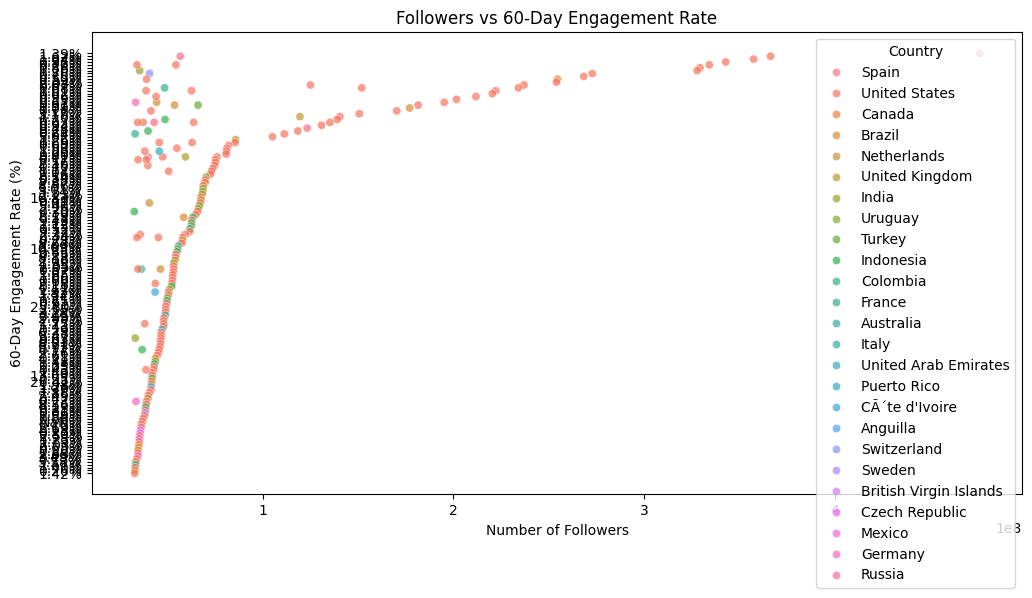

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='followers', y='60_day_eng_rate',
 hue='country', alpha=0.7)
plt.title('Followers vs 60-Day Engagement Rate')
plt.xlabel('Number of Followers')
plt.ylabel('60-Day Engagement Rate (%)')
plt.legend(title='Country')
plt.show()

### Distribution of Influence Score

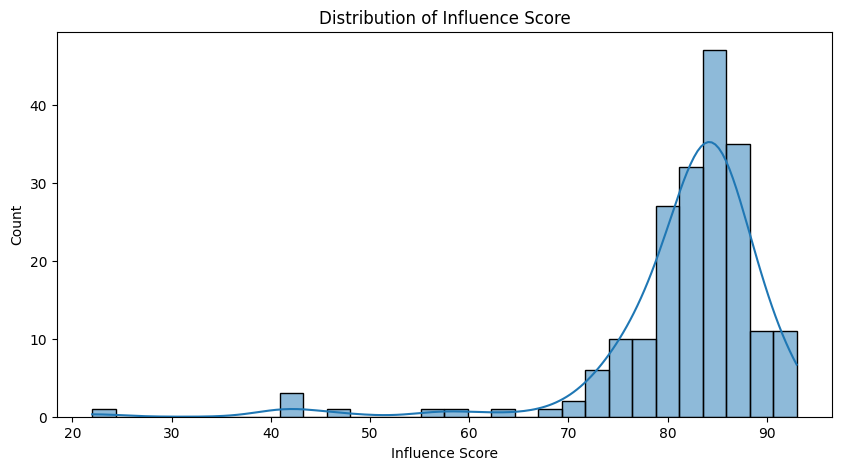

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(data['influence_score'], bins=30, kde=True)
plt.title('Distribution of Influence Score')
plt.xlabel('Influence Score')
plt.show()

### Most active countries

/tmp/ipython-input-27-2161491418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values,


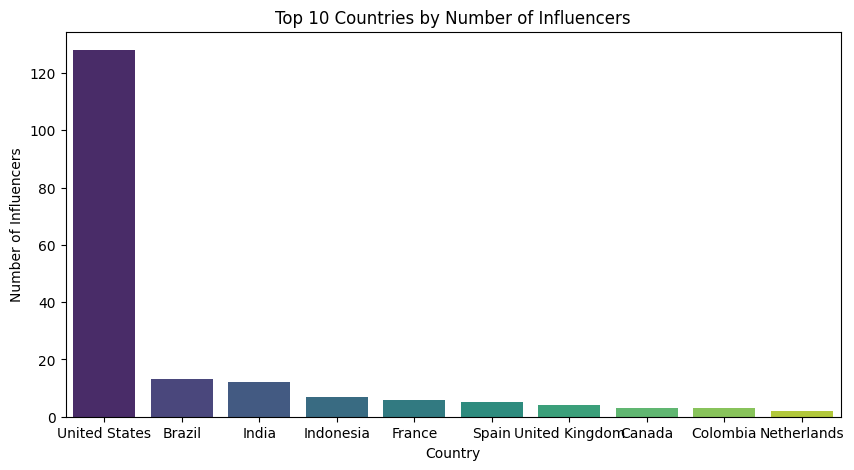

In [27]:
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values,
palette="viridis")
plt.title('Top 10 Countries by Number of Influencers')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.show()

In [30]:
# Creating engagement-related features
data['avg_likes'] = data['avg_likes'].apply(clean_numeric)
data['avg_likes'] = pd.to_numeric(data['avg_likes'])
data['like_follower_ratio'] = data['total_likes'] / data['followers']
data['post_follower_ratio'] = data['posts'] / data['followers']
data['avg_likes_ratio'] = data['avg_likes'] / data['followers']

### Model Building

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [40]:
 # Define feature columns and target variable
X = data[['followers', 'avg_likes', '60_day_eng_rate',
 'new_post_avg_like', 'like_follower_ratio',
 'post_follower_ratio']]
y = data['influence_score']

In [42]:
# Clean and convert '60_day_eng_rate' and 'new_post_avg_like' to numeric
# data['60_day_eng_rate'] = data['60_day_eng_rate'].str.replace('%', '').astype(float) # This line caused the error
data['new_post_avg_like'] = data['new_post_avg_like'].apply(clean_numeric)
data['new_post_avg_like'] = pd.to_numeric(data['new_post_avg_like'])


# Define feature columns and target variable again to include the cleaned columns
X = data[['followers', 'avg_likes', '60_day_eng_rate',
 'new_post_avg_like', 'like_follower_ratio',
 'post_follower_ratio']]
y = data['influence_score']


# train_test_split again to use the updated X
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100,
random_state=42)
model.fit(X_train_scaled, y_train)

 # Predictions and evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 171.79258749999997
R^2 Score: -0.01610707143147594


###  Model Interpretation and Feature Importance

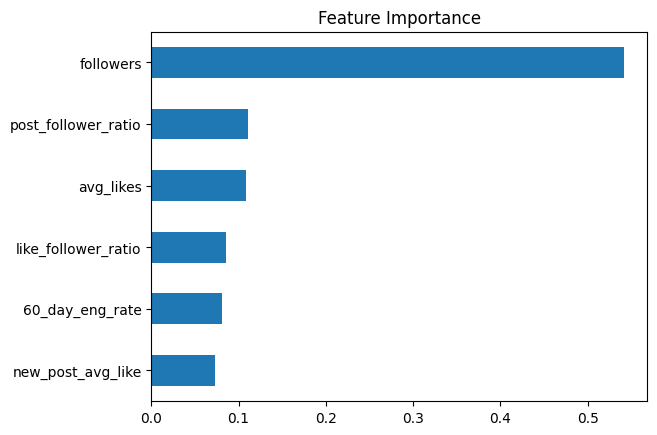

In [44]:
# Display feature importances
feature_importances = pd.Series(model.feature_importances_,
index=X.columns)
feature_importances.sort_values().plot(kind='barh',
title='Feature Importance')
plt.show()


### visualizing predication

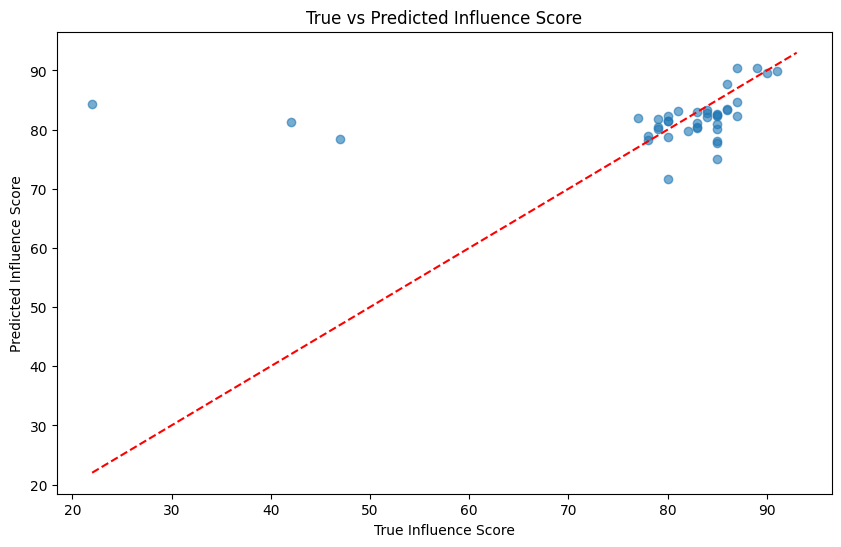

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--',
color='red')
plt.xlabel('True Influence Score')
plt.ylabel('Predicted Influence Score')
plt.title('True vs Predicted Influence Score')
plt.show()

 Observations and Summary
 Top Influential Factors: Feature importance analysis indicates which features most
 influence the influence_score.
 Model Performance: With the achieved R² score, assess the accuracy of the model
 in predicting an influencer's influence score based on follower metrics.
 Business Insights: Using insights on top-engaging influencers by country and
 engagement rates, businesses can strategize influencer collaborations for marketing

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 200 non-null    int64  
 1   channel_info         200 non-null    object 
 2   influence_score      200 non-null    int64  
 3   posts                200 non-null    float64
 4   followers            200 non-null    float64
 5   avg_likes            200 non-null    float64
 6   60_day_eng_rate      199 non-null    float64
 7   new_post_avg_like    200 non-null    float64
 8   total_likes          200 non-null    float64
 9   country              200 non-null    object 
 10  like_follower_ratio  200 non-null    float64
 11  post_follower_ratio  200 non-null    float64
 12  avg_likes_ratio      200 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 20.4+ KB
